In [2]:
import csv

def multiply_csv(input_file,n):
    output_file = input_file[:-4] + '_multiplied.csv'
    with open(input_file, 'r') as input, open(output_file, 'w') as output:
        reader = csv.reader(input)
        writer = csv.writer(output)
        
        header = next(reader)
        writer.writerow(header)
        
        for row in reader:
            for _ in range(n):
                writer.writerow(row)

In [ ]:
import requests
import time
import os
import psycopg2

input_file = "trips.csv"
n_arr = [1, 10, 100, 1000, 10000, 100000, 1000000]
time_arr = []

db_params = {
    'host': 'localhost',
    'database': 'neuralworks',
    'user': 'postgres',
    'password': '12345'
}

table_name = 'trips'

for n in n_arr:
    multiply_csv(input_file, n)
    output_file = input_file[:-4] + "_multiplied.csv"
    start = time.time()
    response = requests.post('http://127.0.0.1:5000/trips', files={"file": open(output_file, "rb")})
    end = time.time()
    
    # For space reasons, we delete the multiplied file and the sql table rows
    os.remove(output_file)
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    query = f"DELETE FROM {table_name}"
    cursor.execute(query)
    conn.commit()
    if cursor:
        cursor.close()
    if conn:
        conn.close()
    
    time_arr.append(end - start)

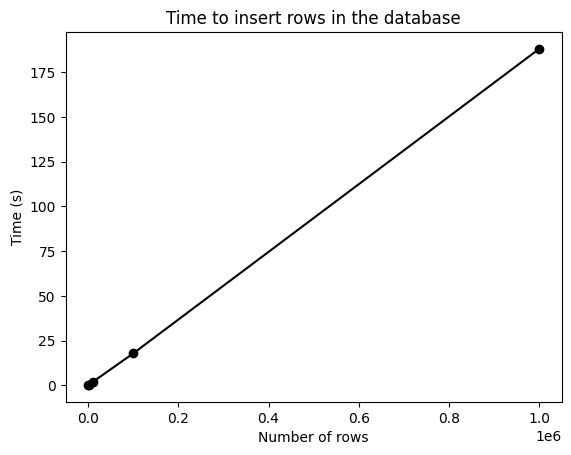

In [18]:
import matplotlib.pyplot as plt

for i in range(len(n_arr)):
    n_arr[i] = n_arr[i] * 100

plt.plot(n_arr[:len(time_arr)], time_arr, '-ok') # Limited by the machine constrains
plt.xlabel("Number of rows")
plt.ylabel("Time (s)")
plt.title("Time to insert rows in the database")
plt.show()